<a href="https://colab.research.google.com/github/yianan261/CS6220/blob/main/Yian_CS6220_HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [240]:
#@title Download Titanic Data
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

!wget https://course.ccs.neu.edu/cs6220/fall2023/homework-7/data/titanic/titanic.train.csv
!wget https://course.ccs.neu.edu/cs6220/fall2023/homework-7/data/titanic/titanic.test.csv
df = pd.read_csv('titanic.train.csv')
df_test = pd.read_csv('titanic.test.csv')

--2023-11-22 01:22:55--  https://course.ccs.neu.edu/cs6220/fall2023/homework-7/data/titanic/titanic.train.csv
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73203 (71K) [text/csv]
Saving to: ‘titanic.train.csv.15’

titanic.train.csv.1 100%[===================>]  71.49K   197KB/s    in 0.4s    

2023-11-22 01:22:57 (197 KB/s) - ‘titanic.train.csv.15’ saved [73203/73203]

--2023-11-22 01:22:57--  https://course.ccs.neu.edu/cs6220/fall2023/homework-7/data/titanic/titanic.test.csv
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35145 (34K) [text/csv]
Saving to: ‘titanic.test.csv.15’

titanic.test.csv.15 100%[===================>]  34.32K   189KB/s    in 0.2s    

2023-11-2

In [241]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3,1,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S,11,NaN,NaN
1,2,1,"Quick, Miss. Winifred Vera",female,8.0,1,1,26360,26.0000,NaN,S,11,NaN,"Plymouth, Devon / Detroit, MI"
2,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S,8,NaN,"Isleworth, England"
3,1,0,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,NaN,269.0,"Milwaukee, WI"
4,3,1,"Daly, Miss. Margaret Marcella ""Maggie""",female,30.0,0,0,382650,6.9500,NaN,Q,15,NaN,"Co Athlone, Ireland New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,"Hays, Mr. Charles Melville",male,55.0,1,1,12749,93.5000,B69,S,NaN,307.0,"Montreal, PQ"
887,3,1,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S,15,NaN,NaN
888,3,0,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,NaN,NaN,NaN
889,3,0,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN,32.0,NaN


## Preprocess Data
Get y_train, y_test, drop unwanted data

In [242]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [243]:
df.replace(" ", float("NaN"), inplace=True)

In [244]:
df = df.drop(['name','cabin','body','home.dest','ticket','boat'], axis=1)
df = df.dropna()

In [245]:
X_train = df[['pclass','sex','age', 'sibsp','fare','embarked']]
y_train = df['survived'].to_numpy()

In [246]:
df_test = df_test.drop(['name','cabin','home.dest','ticket','Unnamed: 0'], axis=1)
df_test = df_test.dropna()

In [247]:
X_test = df_test[['pclass','sex','age', 'sibsp','fare','embarked']]
y_test = df_test['survived'].to_numpy()

In [248]:
#@title Preprocess Data

import numpy as np

def preprocess(df):

  mapping_dict_sex= {'male': 0,'female': 1}

  df['sex'] = df['sex'].map(mapping_dict_sex)  # map sex

  numerical_df = df[['pclass','fare']]

  return numerical_df

In [249]:
#@title One-Hot Encoding for Categorical features
from sklearn.preprocessing import OneHotEncoder

#bins for "age"
bins_age = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels_age = [f"{b}-{b+10}" for b in bins_age[:-1]]
X_train['age_binned'] = pd.cut(X_train['age'], bins=bins_age, labels=labels_age, right=False)
X_test['age_binned'] = pd.cut(X_test['age'], bins=bins_age, labels=labels_age, right=False)

# one-hot encoding for categorical features
categorical_columns = ['age_binned','sibsp', 'embarked']
categorical_df_train = X_train[categorical_columns]
categorical_df_test = X_test[categorical_columns]
ohe = OneHotEncoder(sparse_output=False,handle_unknown = 'ignore').fit(categorical_df_train)
ohe_features_train = ohe.transform(categorical_df_train)
ohe_features_test = ohe.transform(categorical_df_test)

<ipython-input-249-836c2aaca9b6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['age_binned'] = pd.cut(X_train['age'], bins=bins_age, labels=labels_age, right=False)
<ipython-input-249-836c2aaca9b6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['age_binned'] = pd.cut(X_test['age'], bins=bins_age, labels=labels_age, right=False)


In [250]:
#@title Proprocess and normalize data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

train_numerical_df = preprocess(X_train)

# normalize numerical data
scaler = MinMaxScaler().fit(train_numerical_df)
train_numerical_features = scaler.transform(train_numerical_df)

test_numerical_df = preprocess(X_test)
test_numerical_features = scaler.transform(test_numerical_df)
print("train_num_feature shape",train_numerical_features.shape)
print("train_data_ohe",ohe_features_train.shape)
print("test_numerical_features",test_numerical_features.shape)
print("test_data_ohe",ohe_features_test.shape)

train_X = np.hstack((train_numerical_features, ohe_features_train)) # stack numerical and one-hot encoded features
test_X = np.hstack((test_numerical_features, ohe_features_test))


train_num_feature shape (696, 2)
train_data_ohe (696, 18)
test_numerical_features (347, 2)
test_data_ohe (347, 18)


<ipython-input-248-a1107e8090fa>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].map(mapping_dict_sex)  # map sex
<ipython-input-248-a1107e8090fa>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].map(mapping_dict_sex)  # map sex


Give binary cross-entropy cost function:
$\mathcal{L}(W, b) = -\sum_i y_i \log h_{W,b}(\textbf{x}) + (1 - y_i) \log (1 - h_{W,b}(\textbf{x}))$


where $$h_{W,b}(\textbf{x}) = \hat{\textbf{y}} = \sigma ( W^T \textbf{x} + \textbf{b} )$$

where $ \sigma(z) = \frac{1}{1 + e^{-z}} $


In [251]:
#@title Sigmoid function and binary cross-entropy cost function

def sigmoid(z):
  return 1/(1+np.exp(-z))

def logreg(W, x, b):
  return sigmoid(((W @ x.T).T + b))

def costfxn(W, x, y, b):
  yhat = logreg(W, x, b)
  return -np.sum(y*np.log(yhat)+ (1-y)*np.log(1-yhat))

In [252]:
#@title Gradient descent

def gradW(y, W, x, b):
  '''
  Calculate the gradient w/r/t W

  Args:
    * y: N x m matrix
    * W: m x d matrix
    * x: N x d matrix of data
    * b: m offsite vector

  Returns:
    * gradient of size m x d
  '''
  yhat = logreg(W, x, b)
  return (np.expand_dims(yhat - y, 2) * np.expand_dims(x, 1)).sum(axis=0)


def gradb(y, W, x, b):
  '''
  Calculate the gradient w/r/t b

  Args:
    * y: N x m matrix
    * W: m x d matrix
    * x: N x d matrix of data
    * b: m offset vector

  Returns:
    * gradient of size N x m
  '''
  yhat = logreg(W, x, b)
  return (yhat - y).sum(axis=0)


In [253]:
#@title Train model
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(random_state=123)

model_logistic.fit(train_X, y_train)

print("test_X",test_X.shape)
print("train_X",train_X.shape)
train_preds = model_logistic.predict(train_X)
test_preds = model_logistic.predict(test_X)

# Calculate accuracy
train_accuracy = np.sum(train_preds == y_train) / len(y_train)
test_accuracy = np.sum(test_preds == y_test) / len(y_test)

# Print accuracies and cost
print(f"Training Accuracy with threshold of 0.5: {train_accuracy:.2%}")
print(f"Test Accuracy with threshold of 0.5: {test_accuracy:.2%}")
print(f"Features included ['pclass','sex','age', 'sibsp','fare','embarked']")

test_X (347, 20)
train_X (696, 20)
Training Accuracy with threshold of 0.5: 70.55%
Test Accuracy with threshold of 0.5: 72.05%
Features included ['pclass','sex','age', 'sibsp','fare','embarked']


Text(0, 0.5, 'Loss Value')

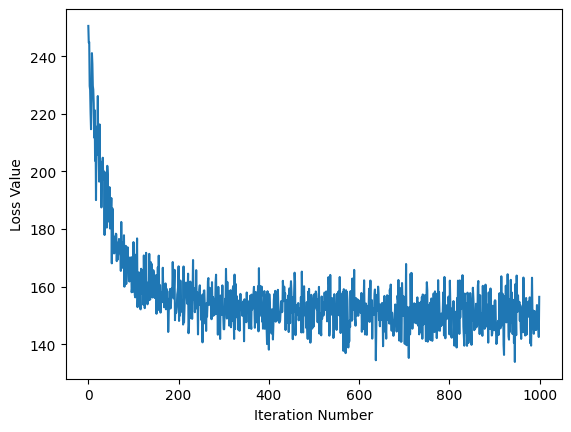

In [254]:
#@title Optimize with Gradient Descent
# Parameters
num_iters = 1000
batch_size = 256
num_labels = 1
N,d = train_X.shape #where N is number of instances, d is number of features
learn_rate = 0.001
random_range = np.random.default_rng(N)

# Randomly initialize
W = np.random.randn(num_labels, d)
b = np.random.randn(num_labels)

# Iterate through num_iters
L = []
for i in range(num_iters):

  # Take a random training sample
  rand_sample = random_range.integers(low=0, high=N-1, size=batch_size)

  # Features
  xtrain_batch = train_X[rand_sample]

  ytrain_batch = y_train[rand_sample].reshape((batch_size,1))

  # Calculate cost function and the gradient
  W -= learn_rate * gradW(ytrain_batch, W, xtrain_batch, b)
  b -= learn_rate * gradb(ytrain_batch, W, xtrain_batch, b)

  L.append(costfxn(W,xtrain_batch,ytrain_batch, b))

yhat = logreg(W, xtrain_batch, b)
plt.plot(L)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Value')

In [255]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a neural network model
model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=d))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [256]:
model.fit(train_X, y_train, epochs=15, batch_size=256, validation_data=(test_X, y_test))

Epoch 1/15
3/3 [==============================] - 1s 116ms/step - loss: 0.7009 - accuracy: 0.4382 - val_loss: 0.6915 - val_accuracy: 0.6167
Epoch 2/15
3/3 [==============================] - 0s 19ms/step - loss: 0.6851 - accuracy: 0.5920 - val_loss: 0.6720 - val_accuracy: 0.6484
Epoch 3/15
3/3 [==============================] - 0s 20ms/step - loss: 0.6731 - accuracy: 0.6135 - val_loss: 0.6569 - val_accuracy: 0.6571
Epoch 4/15
3/3 [==============================] - 0s 19ms/step - loss: 0.6648 - accuracy: 0.6279 - val_loss: 0.6449 - val_accuracy: 0.6599
Epoch 5/15
3/3 [==============================] - 0s 29ms/step - loss: 0.6587 - accuracy: 0.6149 - val_loss: 0.6356 - val_accuracy: 0.6657
Epoch 6/15
3/3 [==============================] - 0s 19ms/step - loss: 0.6527 - accuracy: 0.6193 - val_loss: 0.6288 - val_accuracy: 0.6657
Epoch 7/15
3/3 [==============================] - 0s 27ms/step - loss: 0.6490 - accuracy: 0.6221 - val_loss: 0.6229 - val_accuracy: 0.6772
Epoch 8/15
3/3 [==========

In [257]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_X, y_test, batch_size=256)
print(f"Test loss with Neural Network: {test_loss:.5%}")
print(f"Test Accuracy with Neural Network: {test_accuracy:.2%}")

2/2 [==============================] - 0s 7ms/step - loss: 0.6039 - accuracy: 0.6888
Test loss with Neural Network: 60.39035%
Test Accuracy with Neural Network: 68.88%


In [258]:
#@title Diagram my neural network architecture

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                1344      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3457 (13.50 KB)
Trainable params: 3457 (13.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
